In [1]:
%gui qt

from core.jupyter.setup_form import get_setup_form
from core.configuration.configuration_agregator import ConfigurationAggregator

conf = ConfigurationAggregator()
get_setup_form(conf)

Box(children=(Box(children=(Label(value='Iterations'), interactive(children=(IntSlider(value=100, continuous_u…

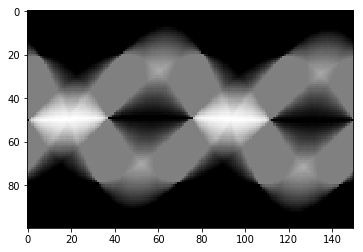

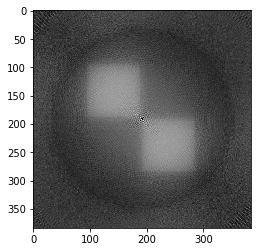

MSE: 65.95


In [8]:
import pydicom
from PIL import Image

from core.configuration.configuration_agregator import ConfigurationAggregator
from core.sinogram import Sinogram
from core.utils.dicom_write import write_dicom
from core.image_processor import ImageProcessor

image = Image.open('images/Kwadraty2.jpg').convert('L')
conf = ConfigurationAggregator(
    iterations=150,
    quantity_of_detectors=100,
    dispersion=90,
    is_filter=False
)

sinogram = Sinogram(conf)
for iteration, _ in sinogram.create_sinogram_from_image(image):
    print('Iteration: {}'.format(iteration))

image2 = sinogram.sinogram_to_image()

print('MSE: {0:0.2f}'.format(ImageProcessor.calculate_medium_squared_error(image2, sinogram.image)))




In [2]:
from core.jupyter.dicom_form import get_dicom_form
get_dicom_form(conf)

Box(children=(Box(children=(Label(value='Name'), interactive(children=(Text(value='Kamil Plucisnki', descripti…